In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
%pwd

'/content'

In [38]:
tdf = pd.read_pickle('drive/MyDrive/L1/Notebooks/dataset/groupby_custno_date_sumpuramount.pkl')


In [39]:
tdf

,고객번호,구매일자,PURAMOUNT
0,00001,2014-01-08,42950
1,00001,2014-01-13,24000
2,00001,2014-01-14,41020
3,00001,2014-01-15,132240
4,00001,2014-01-17,42000
...,...,...,...
6001205,19383,2015-12-19,10250
6001206,19383,2015-12-22,69300
6001207,19383,2015-12-25,28150
6001208,19383,2015-12-30,7820


In [40]:
def cat_date(data):
    if data>=20140101 and data<=20140331: return '1'
    elif data>=20140401 and data<=20140630: return '2'
    elif data>=20140701 and data<=20140930: return '3'
    elif data>=20141001 and data<=20141231: return '4'
    elif data>=20150101 and data<=20150331: return '5'
    elif data>=20150401 and data<=20150630: return '6'
    elif data>=20150701 and data<=20150930: return '7'
    elif data>=20151001 and data<=20151231: return '8'

In [41]:
tdf['구매일자'] = tdf['구매일자'].astype('str')
tdf["구매일자"] = tdf["구매일자"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
tdf['구매일자'] = tdf['구매일자'].astype('int')
tdf['SEASONED'] = tdf['구매일자'].map(cat_date)
# aggregations = {
#     'SEASONED':'mean',
#     'PURAMOUNT':'sum',
# }
# tdf = tdf.groupby('고객번호').agg(aggregations)
tdf = tdf.groupby(['고객번호', 'SEASONED']).sum()
tdf.reset_index(inplace=True)
tdf.rename({'고객번호':'CUSNO', 'PURAMOUNT':'AMT'}, axis=1, inplace=True)
tdf.drop('구매일자', axis=1, inplace=True)
tdf

,CUSNO,SEASONED,AMT
0,00001,1,9141590
1,00001,2,10783765
2,00001,3,10781550
3,00001,4,23334762
4,00001,5,9302985
...,...,...,...
153890,19382,7,1266187
153891,19382,8,1308847
153892,19383,6,27000
153893,19383,7,1092360


In [58]:
tdf_2015

,CUSNO,AMT
4,00001,9302985
5,00001,8595380
6,00001,7806580
7,00001,5295938
12,00002,18481480
...,...,...
153890,19382,1266187
153891,19382,1308847
153892,19383,27000
153893,19383,1092360


In [62]:
tdf_2015

,CUSNO,AMT
4,00001,9302985
5,00001,8595380
6,00001,7806580
7,00001,5295938
12,00002,18481480
...,...,...
153890,19382,1266187
153891,19382,1308847
153892,19383,27000
153893,19383,1092360


In [63]:
tdf_2014 = tdf[(tdf.SEASONED=='1')|(tdf.SEASONED=='2')|(tdf.SEASONED=='3')|(tdf.SEASONED=='4')]
tdf_2015 = tdf[(tdf.SEASONED=='5')|(tdf.SEASONED=='6')|(tdf.SEASONED=='7')|(tdf.SEASONED=='8')]
tdf_2014.drop(['SEASONED'],axis=1,inplace=True)
tdf_2015.drop(['SEASONED'],axis=1,inplace=True)
tdf_2014 = tdf_2014.groupby('CUSNO').sum()
tdf_2015 = tdf_2015.groupby('CUSNO').sum()
tdf_2014.reset_index(inplace=True)
tdf_2015.reset_index(inplace=True)
tdf_year = pd.merge(tdf_2014,tdf_2015 , how='left',left_on = tdf_2014.CUSNO,right_on = tdf_2015.CUSNO)
tdf_year['Cha'] = (tdf_year.AMT_y)- tdf_year.AMT_x
tdf_year

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,key_0,CUSNO_x,AMT_x,CUSNO_y,AMT_y,Cha
0,00001,00001,54041667,00001,31000883.0,-23040784.0
1,00002,00002,46245330,00002,53635430.0,7390100.0
2,00003,00003,1893769,00003,1271398.0,-622371.0
3,00004,00004,9299616,00004,7394194.0,-1905422.0
4,00005,00005,7685880,00005,5551190.0,-2134690.0
...,...,...,...,...,...,...
19333,19376,19376,273297,19376,6795257.0,6521960.0
19334,19377,19377,217360,19377,6053952.0,5836592.0
19335,19378,19378,474760,19378,18008180.0,17533420.0
19336,19379,19379,1190620,19379,4588660.0,3398040.0


In [48]:
tdf_year['Cha'] = (tdf_year.AMT_y)- tdf_year.AMT_x

In [ ]:
tdf_reduce_2014=tdf_year.AMT_x[tdf_year.Cha <0].sum() # 2014년 중 감소고객의 총 소비액
tdf_increase_2014 = tdf_year.AMT_x[tdf_year.Cha>=0].sum() # 2014년 중 증가고객의 총 소비액
tdf_reduce_2015=tdf_year.AMT_y[tdf_year.Cha <0].sum()
tdf_increase_2015 = tdf_year.AMT_y[tdf_year.Cha>=0].sum()

In [35]:
a_2014 = [tdf_reduce_2014, tdf_increase_2014] 
a_2015 = [tdf_reduce_2015, tdf_increase_2015]
labels = ['감소고객','증가,유지고객']
fig = plt.figure(figsize=(15,6))
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.title('2014년도 감소고객, 증가/유지고객 매출 총액')
plt.pie(a_2014,labels = labels,autopct = '%.1f%%',explode = (0,0.1))

NameError: ignored

In [36]:
x_2014 = [81496143734,75140135504,90015263642,82950297701] # 2014년 각 계절별로 총 합산금액 저장
y = ['Spring', 'Summer', 'Fall', 'Winter']
fig = plt.figure(figsize=(15,6))
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rcParams['font.size'] = 20
plt.title('2014년도 시즌별 매출 총액')
plt.pie(x_2015,labels = y,autopct = '%.1f%%',explode = (0,0,0.1,0)) # 2015년 시즌별 매출 총액

FileNotFoundError: ignored

<Figure size 1080x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2b4dcdeee48>,
 [Text(0.7626326835460558, 0.7927114165869833, 'Spring'),
  Text(-0.7320943283169444, 0.8209981086739251, 'Summer'),
  Text(-0.919093885662636, -0.7715351121870978, 'Fall'),
  Text(0.7695742724000625, -0.7859741975789756, 'Winter')],
 [Text(0.41598146375239403, 0.4323880454110817, '25.6%'),
  Text(-0.39932417908196965, 0.4478171501857773, '21.9%'),
  Text(-0.5361380999698709, -0.45006214877580697, '27.1%'),
  Text(0.41976778494548855, -0.4287131986794412, '25.3%')])

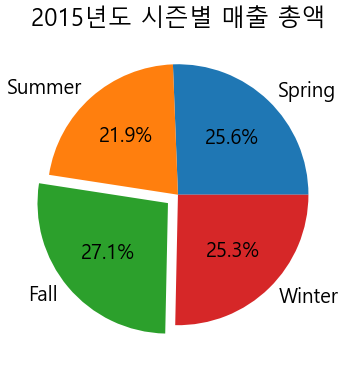

In [ ]:
x_2015 = [88992685655,76254203955,94150226683,88020200067]
y = ['Spring', 'Summer', 'Fall', 'Winter']
fig = plt.figure(figsize=(15,6))
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rcParams['font.size'] = 20
plt.title('2015년도 시즌별 매출 총액')
plt.pie(x_2015,labels = y,autopct = '%.1f%%',explode = (0,0,0.1,0)) # 2015년 시즌별 매출 총액

In [ ]:
tdf_14Spring = tdf[tdf.SEASONED==1] # 계절별로 묶어 데이터프레임 생성 (1,5) 봄 (2,6) 여름 ...
tdf_15Spring = tdf[tdf.SEASONED==5']
tdf_14Summer = tdf[tdf.SEASONED==2]
tdf_15Summer= tdf[tdf.SEASONED==6] 
tdf_14Fall = tdf[tdf.SEASONED==3]
tdf_15Fall = tdf[tdf.SEASONED==7]
tdf_14Winter = tdf[tdf.SEASONED==4]
tdf_15Winter = tdf[tdf.SEASONED==8]

tdf_1 = pd.merge(tdf_14Spring,tdf_14Summer , how='right',left_on = tdf_14Spring.CUSNO,right_on = tdf_14Summer.CUSNO)

tdf_1

,key_0,CUSNO_x,SEASONED_x,AMT_x,CUSNO_y,SEASONED_y,AMT_y
0,00001,00001,1,9141590.0,00001,2,10783765
1,00002,00002,1,14123470.0,00002,2,10199760
2,00003,00003,1,302782.0,00003,2,548433
3,00004,00004,1,1309643.0,00004,2,3732463
4,00005,00005,1,3145330.0,00005,2,2314820
...,...,...,...,...,...,...,...
19134,19356,NaN,NaN,NaN,19356,2,170160
19135,19357,NaN,NaN,NaN,19357,2,91950
19136,19359,NaN,NaN,NaN,19359,2,43190
19137,19360,NaN,NaN,NaN,19360,2,368050


In [ ]:
# tdf_14Spring1 = tdf_14Spring.groupby('CUSNO').sum()
# tdf_14Summer1 = tdf_14Summer.groupby('CUSNO').sum()

In [ ]:
labels = ['2분기','3분기','4분기','5분기','6분기','7분기','8분기']

tdf_14Spring = tdf[tdf.SEASONED=='1'] # 계절별로 묶어 데이터프레임 생성 (1,5) 봄 (2,6) 여름 ...
tdf_15Spring = tdf[tdf.SEASONED=='5']
tdf_14Summer = tdf[tdf.SEASONED=='2']
tdf_15Summer= tdf[tdf.SEASONED=='6'] 
tdf_14Fall = tdf[tdf.SEASONED=='3']
tdf_15Fall = tdf[tdf.SEASONED=='7']
tdf_14Winter = tdf[tdf.SEASONED=='4']
tdf_15Winter = tdf[tdf.SEASONED=='8']

tdf_1 = pd.merge(tdf_14Spring,tdf_14Summer , how='right',left_on = tdf_14Spring.CUSNO,right_on = tdf_14Summer.CUSNO) #CUSTNO 기준으로 right merge 
tdf_2 = pd.merge(tdf_14Summer,tdf_14Fall , how='right',left_on = tdf_14Summer.CUSNO,right_on = tdf_14Fall.CUSNO)
tdf_3 = pd.merge(tdf_14Fall,tdf_14Winter , how='right',left_on = tdf_14Fall.CUSNO,right_on = tdf_14Winter.CUSNO)
tdf_4= pd.merge(tdf_14Winter,tdf_15Spring , how='right',left_on = tdf_14Winter.CUSNO,right_on = tdf_15Spring.CUSNO)
tdf_5 = pd.merge(tdf_15Spring,tdf_15Summer , how='right',left_on = tdf_15Spring.CUSNO,right_on = tdf_15Summer.CUSNO)
tdf_6 = pd.merge(tdf_15Summer,tdf_15Fall , how='right',left_on = tdf_15Summer.CUSNO,right_on = tdf_15Fall.CUSNO)
tdf_7 = pd.merge(tdf_15Fall,tdf_15Winter , how='right',left_on = tdf_15Fall.CUSNO,right_on = tdf_15Winter.CUSNO)

tdf_1['Cha'] = 1.007*(tdf_1.AMT_y)- tdf_1.AMT_x # 구매 금액에 인플레이션 적용
tdf_2['Cha'] = 1.007*(tdf_2.AMT_y)- tdf_2.AMT_x
tdf_3['Cha'] = 1.007*(tdf_3.AMT_y)- tdf_3.AMT_x
tdf_4['Cha'] = 1.007*(tdf_4.AMT_y)- tdf_4.AMT_x
tdf_5['Cha'] = 1.007*(tdf_5.AMT_y)- tdf_5.AMT_x
tdf_6['Cha'] = 1.007*(tdf_6.AMT_y)- tdf_6.AMT_x
tdf_7['Cha'] = 1.007*(tdf_7.AMT_y)- tdf_7.AMT_x

tdf_1

,key_0,CUSNO_x,SEASONED_x,AMT_x,CUSNO_y,SEASONED_y,AMT_y,Cha
0,00001,00001,1,9141590.0,00001,2,10783765,1717661.355
1,00002,00002,1,14123470.0,00002,2,10199760,-3852311.680
2,00003,00003,1,302782.0,00003,2,548433,249490.031
3,00004,00004,1,1309643.0,00004,2,3732463,2448947.241
4,00005,00005,1,3145330.0,00005,2,2314820,-814306.260
...,...,...,...,...,...,...,...,...
19134,19356,NaN,NaN,NaN,19356,2,170160,NaN
19135,19357,NaN,NaN,NaN,19357,2,91950,NaN
19136,19359,NaN,NaN,NaN,19359,2,43190,NaN
19137,19360,NaN,NaN,NaN,19360,2,368050,NaN


In [ ]:
# tdf_14Summer1.reset_index(inplace=True)
# tdf_14Spring1.reset_index(inplace=True)

In [ ]:
a =tdf_1.Cha[tdf_1.Cha<0].count() # 각 분기별 고객 수 
b =tdf_2.Cha[tdf_2.Cha<0].count()
c =tdf_3.Cha[tdf_3.Cha<0].count()
d =tdf_4.Cha[tdf_4.Cha<0].count()
e =tdf_5.Cha[tdf_5.Cha<0].count()
f =tdf_6.Cha[tdf_6.Cha<0].count()
g =tdf_7.Cha[tdf_7.Cha<0].count()

print(a,b,c,d,e,f,g)

8855 9562 7392 10477 9246 9974 9024


In [ ]:
tdf_1_new=tdf_1[tdf_1.CUSNO_x.isnull()].index.values
tdf_1_new

array([  242,  1065,  1091,  1119,  1635,  1917,  4220,  4403,  4801,
        4810,  5052,  5173,  5298,  6053,  6090,  6310,  6838,  7641,
        7778,  7884,  8131,  8264,  8302,  8594,  8751,  8809,  9015,
        9296,  9564,  9594,  9600,  9715,  9717,  9720,  9731,  9836,
       10660, 10802, 11398, 11512, 11826, 11883, 12201, 12218, 12380,
       12414, 12522, 12551, 12745, 13112, 13273, 13539, 13714, 13873,
       13911, 13930, 13942, 14314, 14381, 14535, 14629, 14655, 14746,
       14763, 14806, 14944, 14974, 14997, 15243, 15297, 15303, 15362,
       15364, 15380, 15451, 15550, 15750, 15843, 15979, 16030, 16031,
       16039, 16043, 16222, 16237, 16333, 16366, 16409, 16468, 16580,
       16586, 16651, 16685, 16718, 16796, 16813, 16977, 16991, 17013,
       17305, 17539, 17809, 17837, 17838, 17880, 17935, 17986, 18042,
       18051, 18068, 18130, 18226, 18337, 18338, 18440, 18542, 18558,
       18732, 18737, 18756, 18791, 18826, 18842, 18845, 18894, 18928,
       19006, 19010,

In [ ]:
tdf_1_new_index=tdf_1[tdf_1.CUSNO_x.isnull()].index.values
tdf_2_new_index=tdf_2[tdf_2.CUSNO_x.isnull()].index.values
tdf_3_new_index=tdf_3[tdf_3.CUSNO_x.isnull()].index.values
tdf_4_new_index=tdf_4[tdf_4.CUSNO_x.isnull()].index.values
tdf_5_new_index=tdf_5[tdf_5.CUSNO_x.isnull()].index.values
tdf_6_new_index=tdf_6[tdf_6.CUSNO_x.isnull()].index.values
tdf_7_new_index=tdf_7[tdf_7.CUSNO_x.isnull()].index.values

tdf_1_new = tdf_1.loc[tdf_1_new_index,:]
tdf_2_new = tdf_2.loc[tdf_2_new_index,:]
tdf_3_new = tdf_3.loc[tdf_3_new_index,:]
tdf_4_new = tdf_4.loc[tdf_4_new_index,:]
tdf_5_new = tdf_5.loc[tdf_5_new_index,:]
tdf_6_new = tdf_6.loc[tdf_6_new_index,:]
tdf_7_new = tdf_7.loc[tdf_7_new_index,:]


In [ ]:
new_sum_2 = tdf_1_new.AMT_y.sum()
new_sum_3 = tdf_2_new.AMT_y.sum()
new_sum_4 = tdf_3_new.AMT_y.sum()
new_sum_5 = tdf_4_new.AMT_y.sum()
new_sum_6 = tdf_5_new.AMT_y.sum()
new_sum_7 = tdf_6_new.AMT_y.sum()
new_sum_8 = tdf_7_new.AMT_y.sum()

print('신규고객 총금액합')
print('2분기',new_sum_2,'3분기',new_sum_3,'4분기',new_sum_4,'5분기', new_sum_5,'6분기',new_sum_6,'7분기',new_sum_7,'8분기',new_sum_8)

new_mean_2 = tdf_1_new.AMT_y.mean()
new_mean_3 = tdf_2_new.AMT_y.mean()
new_mean_4 = tdf_3_new.AMT_y.mean()
new_mean_5 = tdf_4_new.AMT_y.mean()
new_mean_6 = tdf_5_new.AMT_y.mean()
new_mean_7 = tdf_6_new.AMT_y.mean()
new_mean_8 = tdf_7_new.AMT_y.mean()

print('신규고객 총금액 평균')
print('2분기',new_mean_2,'3분기',new_mean_3,'4분기',new_mean_4,'5분기', new_mean_5,'6분기',new_mean_6,'7분기',new_mean_7,'8분기',new_mean_8)


신규고객 총금액합
2분기 199769919 3분기 108558766 4분기 124562456 5분기 40231091 6분기 37134116 7분기 28381244 8분기 19797383
신규고객 총금액 평균
2분기 1280576.4038461538 3분기 927852.7008547009 4분기 1448400.6511627906 5분기 718412.3392857143 6분기 728119.9215686275 7분기 788367.8888888889 8분기 482863.0


In [ ]:
tdf_1_old = tdf_1.drop(tdf_1_new_index,axis=0)
tdf_2_old = tdf_2.drop(tdf_2_new_index,axis=0)
tdf_3_old = tdf_3.drop(tdf_3_new_index,axis=0)
tdf_4_old = tdf_4.drop(tdf_4_new_index,axis=0)
tdf_5_old = tdf_5.drop(tdf_5_new_index,axis=0)
tdf_6_old = tdf_6.drop(tdf_6_new_index,axis=0)
tdf_7_old = tdf_7.drop(tdf_7_new_index,axis=0)

old_sum_2 =tdf_1_old.AMT_y.sum()
old_sum_3 =tdf_2_old.AMT_y.sum()
old_sum_4 =tdf_3_old.AMT_y.sum()
old_sum_5 =tdf_4_old.AMT_y.sum()
old_sum_6 =tdf_5_old.AMT_y.sum()
old_sum_7 =tdf_6_old.AMT_y.sum()
old_sum_8 =tdf_7_old.AMT_y.sum()

print('기존고객 총금액')
print('2분기',old_sum_2,'3분기',old_sum_3,'4분기',old_sum_4,'5분기', old_sum_5,'6분기',old_sum_6,'7분기',old_sum_7,'8분기',old_sum_8)

old_mean_2 =tdf_1_old.AMT_y.mean()
old_mean_3 =tdf_2_old.AMT_y.mean()
old_mean_4 =tdf_3_old.AMT_y.mean()
old_mean_5 =tdf_4_old.AMT_y.mean()
old_mean_6 =tdf_5_old.AMT_y.mean()
old_mean_7 =tdf_6_old.AMT_y.mean()
old_mean_8 =tdf_7_old.AMT_y.mean()

print('기존고객 분기별 소비 평균액')
print('2분기',old_mean_2,'3분기',old_mean_3,'4분기',old_mean_4,'5분기', old_mean_5,'6분기',old_mean_6,'7분기',old_mean_7,'8분기',old_mean_8)


기존고객 총금액
2분기 80346197478 3분기 74841155891 4분기 96286833328 5분기 84414244864 6분기 84797540074 7분기 79508169756 8분기 98571817832
기존고객 분기별 소비 평균액
2분기 4232534.240004214 3분기 3919411.1490442525 4분기 5019645.153164425 5분기 4388347.102516116 6분기 4403923.14069073 7분기 4126221.8981784214 8분기 5113176.56561884


In [ ]:
old_season_mean = [old_mean_2, old_mean_3,old_mean_4,old_mean_5,old_mean_6,old_mean_7,old_mean_8] #기존고객 평균
new_season_mean = [new_mean_2, new_mean_3,new_mean_4,new_mean_5,new_mean_6,new_mean_7,new_mean_8] #신규고객 평균
old_season_total = [old_sum_2,old_sum_3,old_sum_4,old_sum_5,old_sum_6,old_sum_7,old_sum_8] #기존고객 총 합계
new_season_total = [new_sum_2,new_sum_3,new_sum_4,new_sum_5,new_sum_6,new_sum_7,new_sum_8] #신규고객 총 합계

In [ ]:
df = pd.DataFrame([old_season_mean,new_season_mean],
                index = ['기존고객','신규고객'],
                columns = ['2분기','3분기','4분기','5분기','6분기','7분기','8분기'])

Text(0.5, 1.0, '분기별 기존고객, 신규고객 평균소비금액')

<Figure size 1440x432 with 0 Axes>

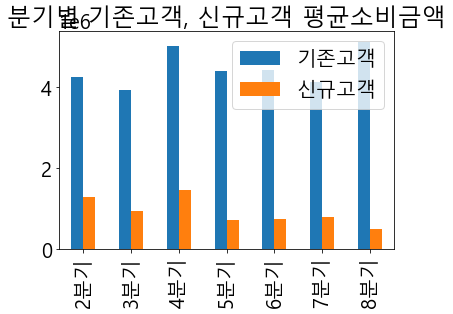

In [ ]:
df =df.transpose()

fig = plt.figure(figsize=(20,6))
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df.plot.bar()
plt.title('분기별 기존고객, 신규고객 평균소비금액')


In [ ]:
old_season_totalmean =pd.Series(old_season_mean).mean()
new_season_totalmean =pd.Series(new_season_mean).mean()

pie_totalmean = [old_season_totalmean ,new_season_totalmean]

labels = ['기존고객','신규고객']

([<matplotlib.patches.Wedge at 0x2b38c54e5c8>,
 [Text(-0.9474542365684614, 0.5588653412124196, '기존고객'),
  Text(1.0335864398928671, -0.6096712813226393, '신규고객')],
 [Text(-0.5167932199464335, 0.30483564066131974, '83.0%'),
  Text(0.6029254232708391, -0.35564158077153957, '17.0%')])

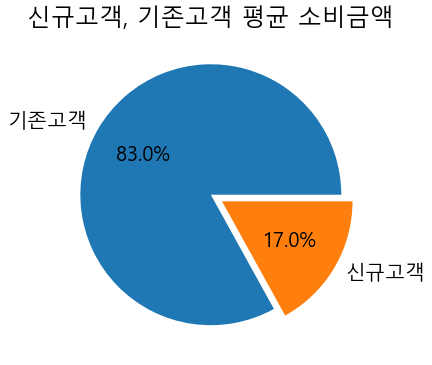

In [ ]:
fig = plt.figure(figsize=(15,6))
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.title('신규고객, 기존고객 평균 소비금액')
plt.pie(pie_totalmean,labels = labels,autopct = '%.1f%%',explode = (0,0.1))